In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cc = np.concatenate
m_pwr = np.linalg.matrix_power

$$\tau_i \dot{x_i} = -x_i + x_i^s I^s(t) + x_i^p I^p(t)$$

$$\dot{x_i} = -x_i/\tau_i + (x_i^s/\tau_i) I^s(t) + (x_i^p/\tau_i) I^p(t)$$

$$\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{I}(t)$$

$$A = \left( \begin{matrix} 
-1/\tau_1 &  & 0 \\
 & \dots & \\
0 & & -1/\tau_N
\end{matrix} \right) \in \mathbb{R}^{N \times N}$$

$$B = \left( \begin{matrix}
x^s_1/\tau_1 & x^p_1/\tau_1 \\
\dots & \dots \\
x^s_N/\tau_N & x^p_N/\tau_N \\
\end{matrix}
\right) \in \mathbb{R}^{N \times 2}$$

$$\mathbf{I}(t) = \left( \begin{matrix}
I^s(t) \\ I^p(t)
\end{matrix} \right) \in \mathbb{R}^2$$

Then controllable subspace (w/ no constraints on $\mathbf{I}$) is column space of $W$ where 

$$W = [B \quad AB \quad A^2B \quad ... \quad A^{N-1}B]$$

In [2]:
# time constants
tau = np.array([1, 1, 3, 3, 5, 5, 7])
a = np.diag(-1/tau)

n = len(tau)

# selectivities
b = np.array([
    [0, 1],
    [1, 0],
    [0, 3],
    [3, 0],
    [0, 5],
    [5, 0],
    [7, 7],
]) / np.tile(tau[:, None], (1, 2))

w = cc([m_pwr(a, i)@b for i in range(n)], axis=1)

np.linalg.matrix_rank(w)

7

In [39]:
# time constants
tau = np.array([1, 2, 3, 4, 5, 6, 7])
a = np.diag(-1/tau)

n = len(tau)

# selectivities
b = np.array([
    [1],
    [1],
    [1],
    [3],
    [1],
    [5],
    [7],
]) / tau

w = cc([m_pwr(a, i)@b for i in range(n)], axis=1)

np.linalg.matrix_rank(w)

7

In [25]:
n = 8

tau = np.random.exponential(2, n)
a = np.diag(-1/tau)

b = np.random.normal(0, 10, (n, 2)) / np.tile(tau[:, None], (1, 2))

w = cc([m_pwr(a, i)@b for i in range(n)], axis=1)

np.linalg.matrix_rank(w)

8

In [202]:
np.linalg.matrix_rank(w[:, :15])

5

In [187]:
w[:, :6]

(8, 16)

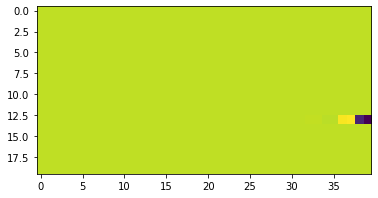

In [95]:
plt.imshow(w)

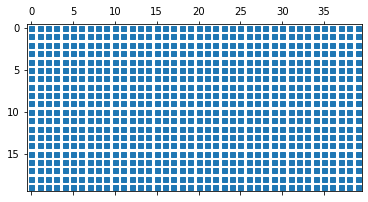

In [100]:
plt.spy(w, markersize=5)

In [101]:
w

array([[-2.55692862e+00,  2.76751212e+00,  9.48830928e-01,
        -1.02697474e+00, -3.52094354e-01,  3.81092138e-01,
         1.30655980e-01, -1.41416544e-01, -4.84841202e-02,
         5.24771750e-02,  1.79915984e-02, -1.94733503e-02,
        -6.67636355e-03,  7.22621544e-03,  2.47748028e-03,
        -2.68152058e-03, -9.19349058e-04,  9.95064800e-04,
         3.41154154e-04, -3.69250925e-04, -1.26596265e-04,
         1.37022479e-04,  4.69776321e-05, -5.08466155e-05,
        -1.74325673e-05,  1.88682786e-05,  6.46891702e-06,
        -7.00168403e-06, -2.40050055e-06,  2.59820095e-06,
         8.90783242e-07, -9.64146360e-07, -3.30553886e-07,
         3.57777640e-07,  1.22662693e-07, -1.32764946e-07,
        -4.55179532e-08,  4.92667204e-08,  1.68909063e-08,
        -1.82820075e-08],
       [-2.85602371e+00,  5.83216894e+00,  1.54762325e+00,
        -3.16033799e+00, -8.38626693e-01,  1.71252519e+00,
         4.54435361e-01, -9.27983821e-01, -2.46249612e-01,
         5.02856237e-01,  1.33